In [54]:
#Handle all major imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
#Load the PIMA Dataset
dataset = pd.read_csv('data/pima_diabetes_10_per.csv')

In [32]:
#Split the dataset
print(dataset.describe())
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean     38.214844  110.627069      73.514433      24.910738   73.631796   
std     129.389004   45.309270      25.264585      21.317005  109.526475   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   92.750000      64.000000       0.000000    0.000000   
50%       3.000000  113.000000      74.000000      25.000000   24.350449   
75%       7.000000  138.000000      82.000000      36.000000  115.000000   
max     748.000000  199.000000     191.355303     109.668810  744.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    37.091396                  3.472756   30.479701    0.348958  
std     43.557549                  9.635686   14.624106    0.476951  
min      0.000000                  

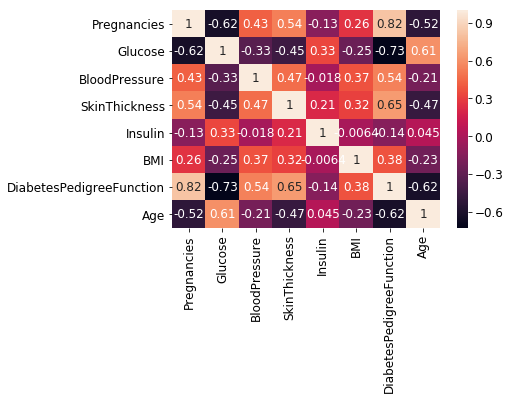

In [33]:
#View The Correlation matrix
sns.heatmap(X.corr(), annot = True)

In [34]:
#Feature Extraction
## Var[X] = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_filtered = sel.fit_transform(X)

print(X.head(1))
print(X_filtered[0])
#DiabetesPedigreeFunction was dropped
X = X.drop('DiabetesPedigreeFunction', axis=1)

top_4_features = SelectKBest(score_func=chi2, k=4)
X_top_4_features = top_4_features.fit_transform(X, y)
print(X.head())
print(X_top_4_features)
X = X.drop(['Pregnancies', 'BloodPressure', 'SkinThickness'], axis=1)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      0.0  33.6   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   Age
0            6    148.0           72.0           35.0      0.0  33.6  50.0
1            1     85.0           66.0           29.0      0.0  26.6  31.0
2            8    183.0           64.0            0.0      0.0  23.3  32.0
3            1     89.0           66.0           23.0     94.0  28.1  21.0
4            0    137.0           40.0           35.0    168.0  43.1  33.0
[[  6.  148.    0.   33.6]
 [  1.   85.    0.   26.6]
 [  8.  183.    0.   23.3]
 ...
 [  5.  121.  112.   26.2]
 [  1.  126.    0.   30.1]
 [  1.   93.    0.   30.4]]


In [35]:
#Splitting the dataset 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [36]:
#Scaling the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [37]:
#Implementing Gaussian NB Classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [38]:
#Predicting the test Set results
y_pred = classifier.predict(X_test)

In [39]:
#Evaluating the Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[100   7]
 [ 35  12]]
0.3636363636363636
0.7272727272727273


In [40]:
#Saving the Confusion Matrix and splitting into 4 variables 
# save confusion matrix and slice into four pieces
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[100   7]
 [ 35  12]]


In [41]:
#Calculating Model Accuracy from the Confusion Matrix
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.7272727272727273
0.7272727272727273


In [42]:
#Calculating Classification Error from the Confusion Matrix
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred))

0.2727272727272727
0.2727272727272727


In [43]:
#Calculate Sensitivity from the Confusion Matrix
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

0.2553191489361702
0.2553191489361702


In [44]:
#Calculate Specificity from the Confusion Matrix
specificity = TN / (TN + FP)

print(specificity)

0.9345794392523364


In [45]:
#Calculate the False Positive Rate from the Confusion Matrix
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)


0.06542056074766354
0.06542056074766356


In [46]:
#Calcualte Precision from the Confusion Matrix
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred))

0.631578947368421
0.631578947368421


In [47]:
#Steps for adjusting the Threshold
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
classifier.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [48]:
# print the first 10 predicted probabilities of class membership
classifier.predict_proba(X_test)[0:10]

array([[0.48408161, 0.51591839],
       [0.75841739, 0.24158261],
       [0.94276346, 0.05723654],
       [0.0070975 , 0.9929025 ],
       [0.85494091, 0.14505909],
       [0.91235208, 0.08764792],
       [0.63952687, 0.36047313],
       [0.38661247, 0.61338753],
       [0.63183161, 0.36816839],
       [0.67643903, 0.32356097]])

In [49]:
# print the first 10 predicted probabilities for class 1
classifier.predict_proba(X_test)[0:10, 1]

array([0.51591839, 0.24158261, 0.05723654, 0.9929025 , 0.14505909,
       0.08764792, 0.36047313, 0.61338753, 0.36816839, 0.32356097])

In [50]:
# store the predicted probabilities for class 1
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

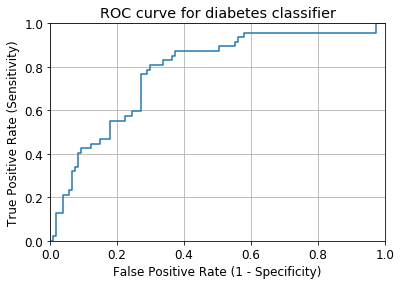

In [51]:
#Plotting ROC Curve
# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [52]:
#Finding out the AUC
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7784847882282759


In [53]:
# calculate cross-validated AUC
from sklearn.cross_validation import cross_val_score
cross_val_score(classifier, X, y, cv=10, scoring='roc_auc').mean()

0.7451908831908832